

<img src="https://github.com/LandaAzul/proyectoIA/blob/master/Imagenes/HC_IA.png?raw=true" alt="Drawing" style="width:1800px;">


---











**INTEGRANTES:**


> **Sebastián Cárdenas Acevedo 2161062**


> **Javier David Landazabal 2151482**







In [0]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.metrics import *

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn import svm


In [0]:
from google.colab import drive
drive.mount('/content/drive')
%cd drive/My Drive/Proyecto IA
!pwd

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
[Errno 2] No such file or directory: 'drive/My Drive/Proyecto IA'
/content/drive/My Drive/Proyecto IA
/content/drive/My Drive/Proyecto IA


### 1. Procesamiento de datos

In [0]:
AtencionMedica = pd.read_csv("AtencionMedica2016.csv")
AtencionMedica = AtencionMedica.drop(columns=['Sintom.Resp'])

In [0]:
AtencionMedica.head(5)  

,docum,fecha,sexo,edad,peso,talla,fcard,fresp,temp,diagn,descripcion_del_diagnostico,est_salida,Unidad_servicio_inicial,Unid_serv_final,entidad,Fecha_nacim,Ciudad_base_de_datos,Procedencia,causa_externa,motivo_de_consulta,planific.,t.embarazo,F.U.R,zona,I_M_C,Tension_Sistolica,Tension_diastolica,TebsMedia,Oximetria,TIPO_DE_USUARIO,RH
0,NOTA,01/01/2016 12:00:00 AM,F,A019,71.0,158.0,86,0,36.6,NaN,NaN,NaN,URGENCIAS,URGENCIAS,CAFESALUD EPS,09/06/1996 12:00:00 AM,TAURAMENA,NaN,ENFERM.GENERAL,ROMPI FUENTE,NaN,0.0,NaN,URBANO,0.0,120.0,60,80.0,98.0,SUBSIDIADO,O +
1,EVOL.,01/01/2016 12:00:00 AM,F,A019,71.0,158.0,0,0,NaN,O429,RUPTURA PREMATURA DE LAS MEMBRANAS SIN,VIVO,URGENCIAS,URGENCIAS,CAFESALUD EPS,09/06/1996 12:00:00 AM,TAURAMENA,NaN,ENFERM.GENERAL,ROMPI FUENTE,NaN,4.0,NaN,URBANO,0.0,0.0,0,0.0,0.0,SUBSIDIADO,O +
2,NOTA,01/01/2016 12:00:00 AM,F,A019,71.0,158.0,0,0,NaN,NaN,NaN,NaN,URGENCIAS,URGENCIAS,CAFESALUD EPS,09/06/1996 12:00:00 AM,TAURAMENA,NaN,ENFERM.GENERAL,ROMPI FUENTE,NaN,0.0,NaN,URBANO,0.0,0.0,0,0.0,0.0,SUBSIDIADO,O +
3,NOTA,01/01/2016 12:00:00 AM,F,A019,71.0,158.0,0,0,NaN,NaN,NaN,NaN,HOSPITALIZACION,HOSPITALIZACION,CAFESALUD EPS,09/06/1996 12:00:00 AM,TAURAMENA,NaN,ENFERM.GENERAL,ROMPI FUENTE,NaN,0.0,NaN,URBANO,0.0,0.0,0,0.0,0.0,SUBSIDIADO,O +
4,FORMU,01/01/2016 12:00:00 AM,M,A078,80.0,160.0,0,0,NaN,A09X,DIARREA Y GASTROENTERITIS DE PRESUNTO OR,NaN,URGENCIAS,URGENCIAS,CAPRESOCA EPS,NaN,TAURAMENA,NaN,NaN,LE DUELE EL ESTOMAGO,NaN,0.0,NaN,URBANO,0.0,0.0,0,0.0,0.0,SUBSIDIADO,NaN


In [0]:
#Remplazar sexomo por 0's y1's
AtencionMedica.loc[AtencionMedica['sexo'] == 'F', 'sexo'] = '0'
AtencionMedica.loc[AtencionMedica['sexo'] == 'M', 'sexo'] = '1'
AtencionMedica.head()

,docum,fecha,sexo,edad,peso,talla,fcard,fresp,temp,diagn,descripcion_del_diagnostico,est_salida,Unidad_servicio_inicial,Unid_serv_final,entidad,Fecha_nacim,Ciudad_base_de_datos,Procedencia,causa_externa,motivo_de_consulta,planific.,t.embarazo,F.U.R,zona,I_M_C,Tension_Sistolica,Tension_diastolica,TebsMedia,Oximetria,TIPO_DE_USUARIO,RH
0,NOTA,01/01/2016 12:00:00 AM,0,A019,71.0,158.0,86,0,36.6,NaN,NaN,NaN,URGENCIAS,URGENCIAS,CAFESALUD EPS,09/06/1996 12:00:00 AM,TAURAMENA,NaN,ENFERM.GENERAL,ROMPI FUENTE,NaN,0.0,NaN,URBANO,0.0,120.0,60,80.0,98.0,SUBSIDIADO,O +
1,EVOL.,01/01/2016 12:00:00 AM,0,A019,71.0,158.0,0,0,NaN,O429,RUPTURA PREMATURA DE LAS MEMBRANAS SIN,VIVO,URGENCIAS,URGENCIAS,CAFESALUD EPS,09/06/1996 12:00:00 AM,TAURAMENA,NaN,ENFERM.GENERAL,ROMPI FUENTE,NaN,4.0,NaN,URBANO,0.0,0.0,0,0.0,0.0,SUBSIDIADO,O +
2,NOTA,01/01/2016 12:00:00 AM,0,A019,71.0,158.0,0,0,NaN,NaN,NaN,NaN,URGENCIAS,URGENCIAS,CAFESALUD EPS,09/06/1996 12:00:00 AM,TAURAMENA,NaN,ENFERM.GENERAL,ROMPI FUENTE,NaN,0.0,NaN,URBANO,0.0,0.0,0,0.0,0.0,SUBSIDIADO,O +
3,NOTA,01/01/2016 12:00:00 AM,0,A019,71.0,158.0,0,0,NaN,NaN,NaN,NaN,HOSPITALIZACION,HOSPITALIZACION,CAFESALUD EPS,09/06/1996 12:00:00 AM,TAURAMENA,NaN,ENFERM.GENERAL,ROMPI FUENTE,NaN,0.0,NaN,URBANO,0.0,0.0,0,0.0,0.0,SUBSIDIADO,O +
4,FORMU,01/01/2016 12:00:00 AM,1,A078,80.0,160.0,0,0,NaN,A09X,DIARREA Y GASTROENTERITIS DE PRESUNTO OR,NaN,URGENCIAS,URGENCIAS,CAPRESOCA EPS,NaN,TAURAMENA,NaN,NaN,LE DUELE EL ESTOMAGO,NaN,0.0,NaN,URBANO,0.0,0.0,0,0.0,0.0,SUBSIDIADO,NaN


In [0]:
#Copiar Dataset Atencion medica
Diagnostico1=AtencionMedica


In [0]:
#filas en descripcion_del_diagnostico
Diagnostico1.shape;
Diagnostico1.descripcion_del_diagnostico.isnull().sum;
#filas nulas en descripcion_del_diagnostico
modDiag = Diagnostico1[Diagnostico1.descripcion_del_diagnostico.isnull()]
modDiag.shape
#drop filas nulas descripcion_del_diagnostico
Diagnostico1.drop(Diagnostico1[Diagnostico1.descripcion_del_diagnostico.isnull()].index, inplace = True)
Diagnostico1.shape

(72275, 31)

In [0]:
#filas en sexo	
Diagnostico1.shape;
Diagnostico1.sexo.isnull().sum;
#filas nulas en sexo	
modSexo = Diagnostico1[Diagnostico1.sexo	.isnull()]
modSexo.shape
#drop filas sexo
Diagnostico1.drop(Diagnostico1[Diagnostico1.sexo.isnull()].index, inplace = True)
Diagnostico1.shape


(72275, 31)

In [0]:
#filas en peso	
Diagnostico1.shape;
Diagnostico1.peso.isnull().sum;
#filas nulas en peso	
modpeso = Diagnostico1[Diagnostico1.peso.isnull()]
modpeso.shape
#drop filas nulas
Diagnostico1.drop(Diagnostico1[Diagnostico1.peso.isnull()].index, inplace = True)
Diagnostico1.shape


(69019, 31)

In [0]:
#filas en talla	
Diagnostico1.shape;
Diagnostico1.talla.isnull().sum;
#filas nulas en talla	
modtalla = Diagnostico1[Diagnostico1.talla.isnull()]
modtalla.shape
#drop filas nulas
Diagnostico1.drop(Diagnostico1[Diagnostico1.talla.isnull()].index, inplace = True)
Diagnostico1.shape


(69019, 31)

In [0]:
#guardar la columna descripcion del diagnostico
labels= Diagnostico1.values[:,10]
print(np.unique(labels),labels.shape)
#se modifica los strings a descripcion del diagnostico 
modificar=preprocessing.LabelEncoder()
ydiag=modificar.fit_transform(labels)
print(ydiag.shape,np.unique(ydiag))
Diagnostico1["Diagnostico_numerica"]=ydiag

['(OSTEO)ARTROSIS PRIMARIA GENERALIZADA' 'ABDOMEN AGUDO'
 'ABORTO ESPONTANEO: COMPLETO O NO ESPECIF' ...
 'VOMITOS DEL EMBARAZO  NO ESPECIFICADO' 'VOMITOS DEL RECIEN NACIDO'
 'VULVITIS AGUDA'] (69019,)
(69019,) [   0    1    2 ... 1558 1559 1560]


In [0]:
Diagnostico1[1000:1005]

,docum,fecha,sexo,edad,peso,talla,fcard,fresp,temp,diagn,descripcion_del_diagnostico,est_salida,Unidad_servicio_inicial,Unid_serv_final,entidad,Fecha_nacim,Ciudad_base_de_datos,Procedencia,causa_externa,motivo_de_consulta,planific.,t.embarazo,F.U.R,zona,I_M_C,Tension_Sistolica,Tension_diastolica,TebsMedia,Oximetria,TIPO_DE_USUARIO,RH,Diagnostico_numerica
1721,FORMU,08/01/2016 12:00:00 AM,0,A079,44.0,155.0,0,0,NaN,K297,GASTRITIS NO ESPECIFICADA,NaN,URGENCIAS,URGENCIAS,CAPRESOCA EPS,NaN,TAURAMENA,NaN,NaN,ANOCHE ME DOLIO LA BOCA DEL ESTOMAGO Y ME TOME LA,NaN,0.0,NaN,RURAL,0.00,0.0,0,0.0,0.0,SUBSIDIADO,NaN,597
1722,H.C.,08/01/2016 12:00:00 AM,0,A079,44.0,155.0,78,18,36.0,K297,GASTRITIS NO ESPECIFICADA,VIVO,URGENCIAS,URGENCIAS,CAPRESOCA EPS,NaN,TAURAMENA,TAURAMENA,ENFERM.GENERAL,ANOCHE ME DOLIO LA BOCA DEL ESTOMAGO Y ME TOME LA,NaN,4.0,NaN,RURAL,18.31,140.0,72,95.0,98.0,SUBSIDIADO,NaN,597
1723,FORMU,08/01/2016 12:00:00 AM,0,A041,60.0,160.0,0,0,NaN,G439,MIGRA�A NO ESPECIFICADA,NaN,URGENCIAS,URGENCIAS,CAPRESOCA EPS,06/06/1974 12:00:00 AM,TAURAMENA,NaN,NaN,TENGO DOLOR DE CABEZA.,NaN,0.0,NaN,URBANO,0.00,0.0,0,0.0,0.0,SUBSIDIADO,O +,871
1724,H.C.,08/01/2016 12:00:00 AM,0,A041,60.0,160.0,75,19,36.4,G439,MIGRA�A NO ESPECIFICADA,VIVO,URGENCIAS,URGENCIAS,CAPRESOCA EPS,06/06/1974 12:00:00 AM,TAURAMENA,TAURAMENA,ENFERM.GENERAL,TENGO DOLOR DE CABEZA.,NaN,4.0,NaN,URBANO,23.44,140.0,100,113.0,98.0,SUBSIDIADO,O +,871
1727,FORMU,08/01/2016 12:00:00 AM,0,A079,44.0,155.0,0,0,NaN,K297,GASTRITIS NO ESPECIFICADA,NaN,URGENCIAS,URGENCIAS,CAPRESOCA EPS,NaN,TAURAMENA,NaN,NaN,ANOCHE ME DOLIO LA BOCA DEL ESTOMAGO Y ME TOME LA,NaN,0.0,NaN,RURAL,0.00,0.0,0,0.0,0.0,SUBSIDIADO,NaN,597


In [0]:
Diagnostico2=Diagnostico1

In [0]:
#filas en fcard	
Diagnostico2.shape;
Diagnostico2.fcard.isnull().sum;
#filas nulas en fcard	
modfcard = Diagnostico2[Diagnostico2.fcard.isnull()]
modfcard.shape
#drop filas nulas
Diagnostico2.drop(Diagnostico2[Diagnostico2.fcard.isnull()].index, inplace = True)
Diagnostico2.shape


(69019, 32)

In [0]:
#filas en fresp	
Diagnostico2.shape;
Diagnostico2.fresp.isnull().sum;
#filas nulas en fresp	
modfresp = Diagnostico2[Diagnostico2.fresp.isnull()]
modfresp.shape
#drop filas nulas
Diagnostico2.drop(Diagnostico2[Diagnostico2.fresp.isnull()].index, inplace = True)
Diagnostico2.shape

(69019, 32)

In [0]:
Diagnostico2.head()

,docum,fecha,sexo,edad,peso,talla,fcard,fresp,temp,diagn,descripcion_del_diagnostico,est_salida,Unidad_servicio_inicial,Unid_serv_final,entidad,Fecha_nacim,Ciudad_base_de_datos,Procedencia,causa_externa,motivo_de_consulta,planific.,t.embarazo,F.U.R,zona,I_M_C,Tension_Sistolica,Tension_diastolica,TebsMedia,Oximetria,TIPO_DE_USUARIO,RH,Diagnostico_numerica
1,EVOL.,01/01/2016 12:00:00 AM,0,A019,71.0,158.0,0,0,NaN,O429,RUPTURA PREMATURA DE LAS MEMBRANAS SIN,VIVO,URGENCIAS,URGENCIAS,CAFESALUD EPS,09/06/1996 12:00:00 AM,TAURAMENA,NaN,ENFERM.GENERAL,ROMPI FUENTE,NaN,4.0,NaN,URBANO,0.00,0.0,0,0.0,0.0,SUBSIDIADO,O +,1248
4,FORMU,01/01/2016 12:00:00 AM,1,A078,80.0,160.0,0,0,NaN,A09X,DIARREA Y GASTROENTERITIS DE PRESUNTO OR,NaN,URGENCIAS,URGENCIAS,CAPRESOCA EPS,NaN,TAURAMENA,NaN,NaN,LE DUELE EL ESTOMAGO,NaN,0.0,NaN,URBANO,0.00,0.0,0,0.0,0.0,SUBSIDIADO,NaN,344
5,H.C.,01/01/2016 12:00:00 AM,1,A078,80.0,160.0,78,19,36.4,A09X,DIARREA Y GASTROENTERITIS DE PRESUNTO OR,VIVO,URGENCIAS,URGENCIAS,CAPRESOCA EPS,NaN,TAURAMENA,TAURAMENA,ENFERM.GENERAL,LE DUELE EL ESTOMAGO,NaN,9.0,NaN,URBANO,31.25,140.0,70,93.0,98.0,SUBSIDIADO,NaN,344
7,FORMU,01/01/2016 12:00:00 AM,1,A057,60.0,160.0,0,0,NaN,A081,GASTROENTEROPATIA AGUDA DEBIDA AL AGENTE,NaN,URGENCIAS,URGENCIAS,CAPRESOCA EPS,10/06/1958 12:00:00 AM,TAURAMENA,NaN,NaN,TENGO DIRREA,NaN,0.0,NaN,URBANO,0.00,0.0,0,0.0,0.0,SUBSIDIADO,NaN,601
8,H.C.,01/01/2016 12:00:00 AM,1,A057,60.0,160.0,96,19,36.4,A081,GASTROENTEROPATIA AGUDA DEBIDA AL AGENTE,VIVO,URGENCIAS,URGENCIAS,CAPRESOCA EPS,10/06/1958 12:00:00 AM,TAURAMENA,TAURAMENA,ENFERM.GENERAL,TENGO DIRREA,NaN,9.0,NaN,URBANO,23.44,120.0,80,93.0,98.0,SUBSIDIADO,NaN,601


In [0]:
Diagnostico3=Diagnostico2

In [0]:
#filas en temp	
Diagnostico2.shape;
Diagnostico2.temp.isnull().sum;
#filas nulas en temp	
modtemp = Diagnostico2[Diagnostico2.temp.isnull()]
modtemp.shape
#drop filas nulas
Diagnostico2.drop(Diagnostico2[Diagnostico2.temp.isnull()].index, inplace = True)
Diagnostico2.shape

(27654, 32)

In [0]:
#filas en I_M_C	
Diagnostico2.shape;
Diagnostico2.I_M_C.isnull().sum;
#filas nulas en I.M.C	
modI_M_C = Diagnostico2[Diagnostico2.I_M_C.isnull()]
modI_M_C.shape
#drop filas nulas
Diagnostico2.drop(Diagnostico2[Diagnostico2.I_M_C.isnull()].index, inplace = True)
Diagnostico2.shape

(27651, 32)

In [0]:
Diagnostico3.head()

,docum,fecha,sexo,edad,peso,talla,fcard,fresp,temp,diagn,descripcion_del_diagnostico,est_salida,Unidad_servicio_inicial,Unid_serv_final,entidad,Fecha_nacim,Ciudad_base_de_datos,Procedencia,causa_externa,motivo_de_consulta,planific.,t.embarazo,F.U.R,zona,I_M_C,Tension_Sistolica,Tension_diastolica,TebsMedia,Oximetria,TIPO_DE_USUARIO,RH,Diagnostico_numerica
5,H.C.,01/01/2016 12:00:00 AM,1,A078,80.0,160.0,78,19,36.4,A09X,DIARREA Y GASTROENTERITIS DE PRESUNTO OR,VIVO,URGENCIAS,URGENCIAS,CAPRESOCA EPS,NaN,TAURAMENA,TAURAMENA,ENFERM.GENERAL,LE DUELE EL ESTOMAGO,NaN,9.0,NaN,URBANO,31.25,140.0,70,93.0,98.0,SUBSIDIADO,NaN,344
8,H.C.,01/01/2016 12:00:00 AM,1,A057,60.0,160.0,96,19,36.4,A081,GASTROENTEROPATIA AGUDA DEBIDA AL AGENTE,VIVO,URGENCIAS,URGENCIAS,CAPRESOCA EPS,10/06/1958 12:00:00 AM,TAURAMENA,TAURAMENA,ENFERM.GENERAL,TENGO DIRREA,NaN,9.0,NaN,URBANO,23.44,120.0,80,93.0,98.0,SUBSIDIADO,NaN,601
26,H.C.,01/01/2016 12:00:00 AM,1,A028,72.0,170.0,94,20,37.0,S223,FRACTURA DE COSTILLA,VIVO,URGENCIAS,URGENCIAS,CAPRECOM,NaN,TAURAMENA,TAURAMENA,LESION AGRESION,LE PEGARON,NaN,9.0,NaN,URBANO,24.91,107.0,58,74.0,97.0,CONTRIBUTIVO,O +,545
28,H.C.,01/01/2016 12:00:00 AM,0,A019,47.0,170.0,104,18,37.0,R104,OTROS DOLORES ABDOMINALES Y LOS NO ESPEC,VIVO,URGENCIAS,URGENCIAS,CAFESALUD EPS,12/08/1996 12:00:00 AM,TAURAMENA,TAURAMENA,ENFERM.GENERAL,TENGO DOLOR ABDOMINAL,NaN,4.0,NaN,URBANO,16.26,100.0,62,75.0,97.0,CONTRIBUTIVO,O +,1045
31,H.C.,01/01/2016 12:00:00 AM,0,A020,74.0,177.0,88,18,37.0,R104,OTROS DOLORES ABDOMINALES Y LOS NO ESPEC,VIVO,URGENCIAS,URGENCIAS,CAFESALUD EPS,NaN,TAURAMENA,TAURAMENA,ENFERM.GENERAL,TENGO SANGRADO VAGINAL,NaN,4.0,NaN,URBANO,23.62,118.0,72,87.0,97.0,CONTRIBUTIVO,O +,1045


In [0]:
Motivo_Consulta=Diagnostico3
Est_salida=Diagnostico3

In [0]:
#filas en motivo_de_consulta
Motivo_Consulta.shape
Motivo_Consulta.motivo_de_consulta.isnull().sum;
#filas nulas en motivo_de_consulta
modMot = Motivo_Consulta[Motivo_Consulta.motivo_de_consulta.isnull()]
modMot.shape
#drop filas nulas
Motivo_Consulta.drop(Motivo_Consulta[Motivo_Consulta.motivo_de_consulta.isnull()].index, inplace = True)
Motivo_Consulta.shape

(24336, 32)

In [0]:
#guardar la columna descripcion de motivo de consulta
array= Motivo_Consulta.values[:,19]   
print(np.unique(array),array.shape)
#se modifica los strings a enteros de motivo de consulta
modificar=preprocessing.LabelEncoder()
ytemp=modificar.fit_transform(array)
print(ytemp.shape,np.unique(ytemp))
Motivo_Consulta["Motivo_numerico"]=ytemp


['!DOLOR DE CABEZA Y FIEBRE' '!LECTURA DE EXAMENES'
 '!LECTURA DE LA RESONANCIA' ... 'traido por bomberos'
 'valoracion especializada por embarazo gemelar'
 '�ORQUE ME DA MUCHO DOLOR DE CABEZA.'] (24336,)
(24336,) [    0     1     2 ... 10921 10922 10923]


In [0]:
Motivo_Consulta.head()

,docum,fecha,sexo,edad,peso,talla,fcard,fresp,temp,diagn,descripcion_del_diagnostico,est_salida,Unidad_servicio_inicial,Unid_serv_final,entidad,Fecha_nacim,Ciudad_base_de_datos,Procedencia,causa_externa,motivo_de_consulta,planific.,t.embarazo,F.U.R,zona,I_M_C,Tension_Sistolica,Tension_diastolica,TebsMedia,Oximetria,TIPO_DE_USUARIO,RH,Diagnostico_numerica,Motivo_numerico
5,H.C.,01/01/2016 12:00:00 AM,1,A078,80.0,160.0,78,19,36.4,A09X,DIARREA Y GASTROENTERITIS DE PRESUNTO OR,VIVO,URGENCIAS,URGENCIAS,CAPRESOCA EPS,NaN,TAURAMENA,TAURAMENA,ENFERM.GENERAL,LE DUELE EL ESTOMAGO,NaN,9.0,NaN,URBANO,31.25,140.0,70,93.0,98.0,SUBSIDIADO,NaN,344,2784
8,H.C.,01/01/2016 12:00:00 AM,1,A057,60.0,160.0,96,19,36.4,A081,GASTROENTEROPATIA AGUDA DEBIDA AL AGENTE,VIVO,URGENCIAS,URGENCIAS,CAPRESOCA EPS,10/06/1958 12:00:00 AM,TAURAMENA,TAURAMENA,ENFERM.GENERAL,TENGO DIRREA,NaN,9.0,NaN,URBANO,23.44,120.0,80,93.0,98.0,SUBSIDIADO,NaN,601,8699
26,H.C.,01/01/2016 12:00:00 AM,1,A028,72.0,170.0,94,20,37.0,S223,FRACTURA DE COSTILLA,VIVO,URGENCIAS,URGENCIAS,CAPRECOM,NaN,TAURAMENA,TAURAMENA,LESION AGRESION,LE PEGARON,NaN,9.0,NaN,URBANO,24.91,107.0,58,74.0,97.0,CONTRIBUTIVO,O +,545,2848
28,H.C.,01/01/2016 12:00:00 AM,0,A019,47.0,170.0,104,18,37.0,R104,OTROS DOLORES ABDOMINALES Y LOS NO ESPEC,VIVO,URGENCIAS,URGENCIAS,CAFESALUD EPS,12/08/1996 12:00:00 AM,TAURAMENA,TAURAMENA,ENFERM.GENERAL,TENGO DOLOR ABDOMINAL,NaN,4.0,NaN,URBANO,16.26,100.0,62,75.0,97.0,CONTRIBUTIVO,O +,1045,8717
31,H.C.,01/01/2016 12:00:00 AM,0,A020,74.0,177.0,88,18,37.0,R104,OTROS DOLORES ABDOMINALES Y LOS NO ESPEC,VIVO,URGENCIAS,URGENCIAS,CAFESALUD EPS,NaN,TAURAMENA,TAURAMENA,ENFERM.GENERAL,TENGO SANGRADO VAGINAL,NaN,4.0,NaN,URBANO,23.62,118.0,72,87.0,97.0,CONTRIBUTIVO,O +,1045,9393


In [0]:
#filas en est_salida
Est_salida.shape
Est_salida.est_salida.isnull().sum;
#filas nulas en est_salida
modEst = Est_salida[Est_salida.est_salida.isnull()]
modEst.shape
#drop filas nulas
Est_salida.drop(Est_salida[Est_salida.est_salida.isnull()].index, inplace = True)
Est_salida.shape

(20706, 33)

In [0]:
#Remplazar Est_sal valores HOSPITALIZ
Est_salida.loc[Est_salida['est_salida'] == 'MUERTO', 'est_salida'] = '0'
Est_salida.loc[Est_salida['est_salida'] == 'OBSERVAC.', 'est_salida'] = '1'
Est_salida.loc[Est_salida['est_salida'] == 'REMITIDO', 'est_salida'] = '2'
Est_salida.loc[Est_salida['est_salida'] == 'VIVO', 'est_salida'] = '3'
Est_salida.loc[Est_salida['est_salida'] == 'HOSPITALIZ', 'est_salida'] = '4'

In [0]:
Est_salida.head()

,docum,fecha,sexo,edad,peso,talla,fcard,fresp,temp,diagn,descripcion_del_diagnostico,est_salida,Unidad_servicio_inicial,Unid_serv_final,entidad,Fecha_nacim,Ciudad_base_de_datos,Procedencia,causa_externa,motivo_de_consulta,planific.,t.embarazo,F.U.R,zona,I_M_C,Tension_Sistolica,Tension_diastolica,TebsMedia,Oximetria,TIPO_DE_USUARIO,RH,Diagnostico_numerica,Motivo_numerico
5,H.C.,01/01/2016 12:00:00 AM,1,A078,80.0,160.0,78,19,36.4,A09X,DIARREA Y GASTROENTERITIS DE PRESUNTO OR,3,URGENCIAS,URGENCIAS,CAPRESOCA EPS,NaN,TAURAMENA,TAURAMENA,ENFERM.GENERAL,LE DUELE EL ESTOMAGO,NaN,9.0,NaN,URBANO,31.25,140.0,70,93.0,98.0,SUBSIDIADO,NaN,344,2784
8,H.C.,01/01/2016 12:00:00 AM,1,A057,60.0,160.0,96,19,36.4,A081,GASTROENTEROPATIA AGUDA DEBIDA AL AGENTE,3,URGENCIAS,URGENCIAS,CAPRESOCA EPS,10/06/1958 12:00:00 AM,TAURAMENA,TAURAMENA,ENFERM.GENERAL,TENGO DIRREA,NaN,9.0,NaN,URBANO,23.44,120.0,80,93.0,98.0,SUBSIDIADO,NaN,601,8699
26,H.C.,01/01/2016 12:00:00 AM,1,A028,72.0,170.0,94,20,37.0,S223,FRACTURA DE COSTILLA,3,URGENCIAS,URGENCIAS,CAPRECOM,NaN,TAURAMENA,TAURAMENA,LESION AGRESION,LE PEGARON,NaN,9.0,NaN,URBANO,24.91,107.0,58,74.0,97.0,CONTRIBUTIVO,O +,545,2848
28,H.C.,01/01/2016 12:00:00 AM,0,A019,47.0,170.0,104,18,37.0,R104,OTROS DOLORES ABDOMINALES Y LOS NO ESPEC,3,URGENCIAS,URGENCIAS,CAFESALUD EPS,12/08/1996 12:00:00 AM,TAURAMENA,TAURAMENA,ENFERM.GENERAL,TENGO DOLOR ABDOMINAL,NaN,4.0,NaN,URBANO,16.26,100.0,62,75.0,97.0,CONTRIBUTIVO,O +,1045,8717
31,H.C.,01/01/2016 12:00:00 AM,0,A020,74.0,177.0,88,18,37.0,R104,OTROS DOLORES ABDOMINALES Y LOS NO ESPEC,3,URGENCIAS,URGENCIAS,CAFESALUD EPS,NaN,TAURAMENA,TAURAMENA,ENFERM.GENERAL,TENGO SANGRADO VAGINAL,NaN,4.0,NaN,URBANO,23.62,118.0,72,87.0,97.0,CONTRIBUTIVO,O +,1045,9393


In [0]:
Tension_media=Diagnostico2

In [0]:
#filas en Tension_Sistolica
Tension_media.shape
Tension_media.Tension_Sistolica.isnull().sum;
#filas nulas en Tension_Sistolica
modEst = Tension_media[Tension_media.Tension_Sistolica.isnull()]
modEst.shape
#drop filas nulas
Tension_media.drop(Tension_media[Tension_media.Tension_Sistolica.isnull()].index, inplace = True)
Tension_media.shape

(20706, 33)

In [0]:
#filas en Tension_diastolica
Tension_media.shape
Tension_media.Tension_diastolica.isnull().sum;
#filas nulas en Tension_diastolica
modEst = Tension_media[Tension_media.Tension_diastolica.isnull()]
modEst.shape
#drop filas nulas
Tension_media.drop(Tension_media[Tension_media.Tension_diastolica.isnull()].index, inplace = True)
Tension_media.shape

(20706, 33)

In [0]:
#filas en TebsMedia
Tension_media.shape
Tension_media.TebsMedia.isnull().sum;
#filas nulas en TebsMedia
modEst = Tension_media[Tension_media.TebsMedia.isnull()]
modEst.shape
#drop filas nulas
Tension_media.drop(Tension_media[Tension_media.TebsMedia.isnull()].index, inplace = True)
Tension_media.shape

(20706, 33)

In [0]:
#filas en Oximetria
Tension_media.shape
Tension_media.Oximetria.isnull().sum;
#filas nulas en Oximetria
modEst = Tension_media[Tension_media.Oximetria.isnull()]
modEst.shape
#drop filas nulas
Tension_media.drop(Tension_media[Tension_media.Oximetria.isnull()].index, inplace = True)
Tension_media.shape

(20706, 33)

In [0]:
#filas en RH
Tension_media.shape
Tension_media.RH.isnull().sum;
#filas nulas en RH
modEst = Tension_media[Tension_media.RH.isnull()]
modEst.shape
#drop filas nulas
Tension_media.drop(Tension_media[Tension_media.RH.isnull()].index, inplace = True)
Tension_media.shape

(12389, 33)

In [0]:
RH= Tension_media.values[:,-1]
print(np.unique(RH),RH.shape)

[1 2 5 ... 10920 10921 10922] (12389,)


In [0]:
#Remplazar sexomo por 0's y1's
Tension_media.loc[Tension_media['RH'] == 'A +', 'RH'] = '0'
Tension_media.loc[Tension_media['RH'] == 'A -', 'RH'] = '1'
Tension_media.loc[Tension_media['RH'] == 'AB+', 'RH'] = '2'
Tension_media.loc[Tension_media['RH'] == 'AB-', 'RH'] = '3'
Tension_media.loc[Tension_media['RH'] == 'B +', 'RH'] = '4'
Tension_media.loc[Tension_media['RH'] == 'B -', 'RH'] = '5'
Tension_media.loc[Tension_media['RH'] == 'O +', 'RH'] = '6'
Tension_media.loc[Tension_media['RH'] == 'O -', 'RH'] = '7'
Tension_media.head()

,docum,fecha,sexo,edad,peso,talla,fcard,fresp,temp,diagn,descripcion_del_diagnostico,est_salida,Unidad_servicio_inicial,Unid_serv_final,entidad,Fecha_nacim,Ciudad_base_de_datos,Procedencia,causa_externa,motivo_de_consulta,planific.,t.embarazo,F.U.R,zona,I_M_C,Tension_Sistolica,Tension_diastolica,TebsMedia,Oximetria,TIPO_DE_USUARIO,RH,Diagnostico_numerica,Motivo_numerico
26,H.C.,01/01/2016 12:00:00 AM,1,A028,72.0,170.0,94,20,37.0,S223,FRACTURA DE COSTILLA,3,URGENCIAS,URGENCIAS,CAPRECOM,NaN,TAURAMENA,TAURAMENA,LESION AGRESION,LE PEGARON,NaN,9.0,NaN,URBANO,24.91,107.0,58,74.0,97.0,CONTRIBUTIVO,6,545,2848
28,H.C.,01/01/2016 12:00:00 AM,0,A019,47.0,170.0,104,18,37.0,R104,OTROS DOLORES ABDOMINALES Y LOS NO ESPEC,3,URGENCIAS,URGENCIAS,CAFESALUD EPS,12/08/1996 12:00:00 AM,TAURAMENA,TAURAMENA,ENFERM.GENERAL,TENGO DOLOR ABDOMINAL,NaN,4.0,NaN,URBANO,16.26,100.0,62,75.0,97.0,CONTRIBUTIVO,6,1045,8717
31,H.C.,01/01/2016 12:00:00 AM,0,A020,74.0,177.0,88,18,37.0,R104,OTROS DOLORES ABDOMINALES Y LOS NO ESPEC,3,URGENCIAS,URGENCIAS,CAFESALUD EPS,NaN,TAURAMENA,TAURAMENA,ENFERM.GENERAL,TENGO SANGRADO VAGINAL,NaN,4.0,NaN,URBANO,23.62,118.0,72,87.0,97.0,CONTRIBUTIVO,6,1045,9393
35,H.C.,01/01/2016 12:00:00 AM,0,A024,54.0,140.0,84,18,37.0,Z359,SUPERVISION DE EMBARAZO DE ALTO RIESGO,3,URGENCIAS,URGENCIAS,CAPRESOCA EPS,NaN,TAURAMENA,TAURAMENA,ENFERM.GENERAL,SE ME CUMPLIO LA FECHA Y NO ME HAN DADO DOLORES,DIU,3.0,NaN,URBANO,27.55,118.0,66,83.0,97.0,SUBSIDIADO,0,1304,7963
38,H.C.,01/01/2016 12:00:00 AM,0,A044,89.0,160.0,58,18,37.0,L028,ABSCESO CUTANEO FURUNCULO Y ANTRAX DE O,3,URGENCIAS,URGENCIAS,CAPRESOCA EPS,NaN,TAURAMENA,TAURAMENA,ENFERM.GENERAL,TENGO UNAS BOLAS,NaN,4.0,NaN,URBANO,34.77,116.0,64,81.0,97.0,CONTRIBUTIVO,6,13,9730


In [0]:
AtencionMedica.describe()

,peso,talla,fcard,fresp,temp,t.embarazo,I_M_C,Tension_Sistolica,Tension_diastolica,TebsMedia,Oximetria,Diagnostico_numerica,Motivo_numerico
count,12389.000000,12389.000000,12389.000000,12389.000000,12389.000000,12389.000000,12389.000000,12389.000000,12389.000000,12389.000000,12389.000000,12389.000000,12389.000000
mean,78.422431,154.677859,80.142949,18.407700,36.496141,5.523368,24.926854,110.984906,70.659537,84.030915,86.801840,723.439664,4837.046896
std,409.745256,18.658906,11.966493,3.447115,1.683192,2.632208,6.753805,21.962204,14.457441,16.363937,70.532768,422.492064,3190.945148
min,0.500000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,53.000000,151.000000,74.000000,18.000000,36.400000,4.000000,21.500000,100.000000,70.000000,80.000000,94.000000,372.000000,2132.000000
50%,63.000000,160.000000,78.000000,18.000000,36.500000,4.000000,24.460000,111.000000,70.000000,87.000000,95.000000,704.000000,4635.000000
75%,72.000000,165.000000,85.000000,19.000000,36.800000,9.000000,27.820000,120.000000,80.000000,93.000000,98.000000,1045.000000,7626.000000
max,23800.000000,194.000000,200.000000,100.000000,39.900000,9.000000,99.000000,245.000000,200.000000,215.000000,998.000000,1560.000000,10922.000000


In [0]:
AtencionMedica.columns

Index(['docum', 'fecha', 'sexo', 'edad', 'peso', 'talla', 'fcard', 'fresp',
       'temp', 'diagn', 'descripcion_del_diagnostico', 'est_salida',
       'Unidad_servicio_inicial', 'Unid_serv_final', 'entidad', 'Fecha_nacim',
       'Ciudad_base_de_datos', 'Procedencia', 'causa_externa',
       'motivo_de_consulta', 'planific.', 't.embarazo', 'F.U.R', 'zona',
       'I_M_C', 'Tension_Sistolica', 'Tension_diastolica', 'TebsMedia',
       'Oximetria', 'TIPO_DE_USUARIO', 'RH', 'Diagnostico_numerica',
       'Motivo_numerico'],
      dtype='object')

# 2. Aplicacion de ML

se estimar el estado de salida para los pacientes.
Como caracteristicas se utilizaran las caracteristicas {sexo,	edad,	peso,	talla}
Se debe permutar el dataset
El 80% del dataset se utilizará como train: X_train, y_train
El 20% del dataset restante se utilizará como test: X_test, y_test

In [0]:
def show_curve(est):
    means, stds = [], []
    nfolds_range = range(2,11)
    for nfolds in nfolds_range:
        print (nfolds,)
        s = cross_val_score(est, X, y, cv=KFold(nfolds, shuffle=True), scoring=make_scorer(mean_squared_error))
        means.append(np.mean(s))
        stds.append(np.std(s))

    means = np.r_[means]
    #stds  = np.r_[stds]

    plt.plot(nfolds_range, means, label="mean", color="black")
    #plt.fill_between(nfolds_range, means-stds, means+stds, color="blue", alpha=.5, label="std")
    plt.xlabel("n folds")
    plt.ylabel("performance")
    plt.legend()

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn import svm
vals = Diagnostico1.values

X = vals[:, [2,4,5]]#caracteristicas= sexo(2),peso(4), talla(5)
y = vals[:,-1]      #ultima columna de "d"=descripcion_numerica
y=y.astype('int')
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

est_SVC = svm.SVC(kernel='rbf')
est_RF = RandomForestClassifier(max_depth=5, random_state=0)
est_G = GaussianNB()



est_SVC.fit(X_train, y_train)
est_RF.fit(X_train, y_train)
est_G.fit(X_train, y_train)

prediction_SVC = est_SVC.predict(X_test)
prediction_RF = est_RF.predict(X_test)
prediction_G = est_G.predict(X_test)


RMAE_SVC = np.sqrt(mean_absolute_error(prediction_SVC, y_test))
RMAE_RF = np.sqrt(mean_absolute_error(prediction_RF, y_test))
RMAE_G = np.sqrt(mean_absolute_error(prediction_G, y_test))



print(RMAE_SVC)
print(RMAE_RF)
print(RMAE_G)

53.69511575565243
55.46661699879815
60.56708072171655


In [0]:
#show_curve( RandomForestClassifier())
plt.figure(figsize=(10,3))
plt.subplot(121)
show_curve(svm.SVC())
plt.title("Support Vector Machine")

plt.subplot(122)
show_curve(GaussianNB())
plt.title("Gaussian")

plt.subplot(123)
show_curve( RandomForestClassifier())
plt.title("RandomForestClassifier()")

2
3
4
5
6
7
8
9


2
3
4
5
6
7
8
9
10


Text(0.5, 1.0, 'Gaussian')

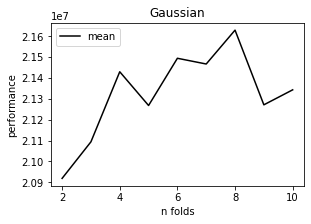

In [0]:
plt.figure(figsize=(10,3))
plt.subplot(122)
show_curve(GaussianNB())
plt.title("Gaussian")


In [0]:
#Diagnostico2 con SVC_rbf RF(5,5)

vals = Diagnostico2.values
X = vals[:, [2,4,5,6,7]]    #caracteristicas= sexo(2),peso(4), talla(5),fcard(6),fresp(7)
y = vals[:,-1]              # Diagnostico

y=y.astype('int')
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

est_SVC = svm.SVC(kernel='rbf')
est_RF = RandomForestClassifier(max_depth=5, random_state=0)
est_G = GaussianNB()



est_SVC.fit(X_train, y_train)
est_RF.fit(X_train, y_train)
est_G.fit(X_train, y_train)

prediction_SVC = est_SVC.predict(X_test)
prediction_RF = est_RF.predict(X_test)
prediction_G = est_G.predict(X_test)


RMAE_SVC = np.sqrt(mean_absolute_error(prediction_SVC, y_test))
RMAE_RF = np.sqrt(mean_absolute_error(prediction_RF, y_test))
RMAE_G = np.sqrt(mean_absolute_error(prediction_G, y_test))

print(RMAE_SVC)
print(RMAE_RF)
print(RMAE_G)


54.082914701698115
54.122682210147914
57.62748088952281


In [0]:
#show_curve( RandomForestClassifier())
plt.figure(figsize=(10,3))
plt.subplot(121)
show_curve(svm.SVC())
plt.title("Support Vector Machine")

plt.subplot(122)
show_curve(GaussianNB())
plt.title("Gaussian")

plt.subplot(123)
show_curve( RandomForestClassifier())
plt.title("RandomForestClassifier()")

2
3
4
5
6
7
8
9
10


Text(0.5, 1.0, 'Gaussian')

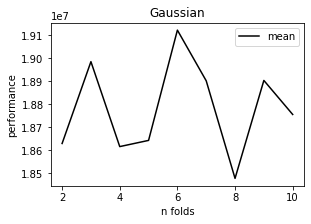

In [0]:
plt.figure(figsize=(10,3))
plt.subplot(122)
show_curve(GaussianNB())
plt.title("Gaussian")

In [0]:
#Diagnostico3 con SVR_rbf RF(5,5)

vals = Diagnostico3.values
X = vals[:, [2,4,5,6,7,8,24]]    #caracteristicas= sexo(2),peso(4), talla(5),fcard(6),fresp(7),temp(8),IMC(24)
y = vals[:,-1]              # Diagnostico

y=y.astype('int')
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

est_SVC = svm.SVC(kernel='rbf')
est_RF = RandomForestClassifier(max_depth=5, random_state=0)
est_G = GaussianNB()



est_SVC.fit(X_train, y_train)
est_RF.fit(X_train, y_train)
est_G.fit(X_train, y_train)

prediction_SVC = est_SVC.predict(X_test)
prediction_RF = est_RF.predict(X_test)
prediction_G = est_G.predict(X_test)


RMAE_SVC = np.sqrt(mean_absolute_error(prediction_SVC, y_test))
RMAE_RF = np.sqrt(mean_absolute_error(prediction_RF, y_test))
RMAE_G = np.sqrt(mean_absolute_error(prediction_G, y_test))

print(RMAE_SVC)
print(RMAE_RF)
print(RMAE_G)


53.54401235507014
52.00776778140473
56.64558193882428


In [0]:
#show_curve( RandomForestClassifier())
plt.figure(figsize=(10,3))
plt.subplot(121)
show_curve(svm.SVC())
plt.title("Support Vector Machine")

plt.subplot(122)
show_curve(GaussianNB())
plt.title("Gaussian")

plt.subplot(123)
show_curve( RandomForestClassifier())
plt.title("RandomForestClassifier()")

2
3
4
5
6
7
8
9
10


Text(0.5, 1.0, 'Gaussian')

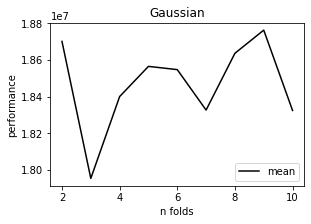

In [0]:
plt.figure(figsize=(10,3))
plt.subplot(122)
show_curve(GaussianNB())
plt.title("Gaussian")

In [0]:
vals = Motivo_Consulta.values

X = vals[:, [2,4,5,6,7,8,24]]    #caracteristicas= sexo(2),peso(4), talla(5),fcard(6),fresp(7),temp(8),IMC(24)
y = vals[:,-1]              # columna 32 (Motivo_Consulta)
y=y.astype('int')
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

est_SVC = svm.SVC(kernel='rbf')
est_RF = RandomForestClassifier(max_depth=5, random_state=0)
est_G = GaussianNB()



est_SVC.fit(X_train, y_train)
est_RF.fit(X_train, y_train)
est_G.fit(X_train, y_train)

prediction_SVC = est_SVC.predict(X_test)
prediction_RF = est_RF.predict(X_test)
prediction_G = est_G.predict(X_test)


RMAE_SVC = np.sqrt(mean_absolute_error(prediction_SVC, y_test))
RMAE_RF = np.sqrt(mean_absolute_error(prediction_RF, y_test))
RMAE_G = np.sqrt(mean_absolute_error(prediction_G, y_test))

print(RMAE_SVC)
print(RMAE_RF)
print(RMAE_G)

53.56596636129635
52.00970372611993
56.817888002762224


In [0]:
#show_curve( RandomForestClassifier())
plt.figure(figsize=(10,3))
plt.subplot(121)
show_curve(svm.SVC())
plt.title("Support Vector Machine")

plt.subplot(122)
show_curve(GaussianNB())
plt.title("Gaussian")

plt.subplot(123)
show_curve( RandomForestClassifier())
plt.title("RandomForestClassifier()")

2
3
4
5
6
7
8
9
10


Text(0.5, 1.0, 'Gaussian')

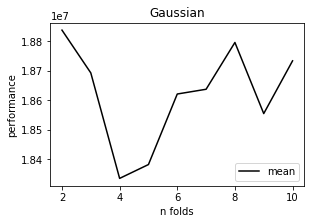

In [0]:
plt.figure(figsize=(10,3))
plt.subplot(122)
show_curve(GaussianNB())
plt.title("Gaussian")


In [0]:
Est_salida

,docum,fecha,sexo,edad,peso,talla,fcard,fresp,temp,diagn,descripcion_del_diagnostico,est_salida,Unidad_servicio_inicial,Unid_serv_final,entidad,Fecha_nacim,Ciudad_base_de_datos,Procedencia,causa_externa,motivo_de_consulta,planific.,t.embarazo,F.U.R,zona,I_M_C,Tension_Sistolica,Tension_diastolica,TebsMedia,Oximetria,TIPO_DE_USUARIO,RH,Diagnostico_numerica,Motivo_numerico
26,H.C.,01/01/2016 12:00:00 AM,1,A028,72.0,170.0,94,20,37.0,S223,FRACTURA DE COSTILLA,3,URGENCIAS,URGENCIAS,CAPRECOM,NaN,TAURAMENA,TAURAMENA,LESION AGRESION,LE PEGARON,NaN,9.0,NaN,URBANO,24.91,107.0,58,74.0,97.0,CONTRIBUTIVO,6,545,2848
28,H.C.,01/01/2016 12:00:00 AM,0,A019,47.0,170.0,104,18,37.0,R104,OTROS DOLORES ABDOMINALES Y LOS NO ESPEC,3,URGENCIAS,URGENCIAS,CAFESALUD EPS,12/08/1996 12:00:00 AM,TAURAMENA,TAURAMENA,ENFERM.GENERAL,TENGO DOLOR ABDOMINAL,NaN,4.0,NaN,URBANO,16.26,100.0,62,75.0,97.0,CONTRIBUTIVO,6,1045,8717
31,H.C.,01/01/2016 12:00:00 AM,0,A020,74.0,177.0,88,18,37.0,R104,OTROS DOLORES ABDOMINALES Y LOS NO ESPEC,3,URGENCIAS,URGENCIAS,CAFESALUD EPS,NaN,TAURAMENA,TAURAMENA,ENFERM.GENERAL,TENGO SANGRADO VAGINAL,NaN,4.0,NaN,URBANO,23.62,118.0,72,87.0,97.0,CONTRIBUTIVO,6,1045,9393
35,H.C.,01/01/2016 12:00:00 AM,0,A024,54.0,140.0,84,18,37.0,Z359,SUPERVISION DE EMBARAZO DE ALTO RIESGO,3,URGENCIAS,URGENCIAS,CAPRESOCA EPS,NaN,TAURAMENA,TAURAMENA,ENFERM.GENERAL,SE ME CUMPLIO LA FECHA Y NO ME HAN DADO DOLORES,DIU,3.0,NaN,URBANO,27.55,118.0,66,83.0,97.0,SUBSIDIADO,0,1304,7963
38,H.C.,01/01/2016 12:00:00 AM,0,A044,89.0,160.0,58,18,37.0,L028,ABSCESO CUTANEO FURUNCULO Y ANTRAX DE O,3,URGENCIAS,URGENCIAS,CAPRESOCA EPS,NaN,TAURAMENA,TAURAMENA,ENFERM.GENERAL,TENGO UNAS BOLAS,NaN,4.0,NaN,URBANO,34.77,116.0,64,81.0,97.0,CONTRIBUTIVO,6,13,9730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127361,H.C.,NaN,0,A076,65.0,150.0,100,22,37.4,R05X,TOS,3,URGENCIAS,URGENCIAS,EPS CONVIDA,NaN,FUSAGASUGA,FUSAGASUGA,ENFERM.GENERAL,TIENE TOS Y FIEBRE,NaN,4.0,NaN,URBANO,28.89,140.0,80,100.0,95.0,SUBSIDIADO,6,1340,10071
127364,H.C.,NaN,0,A030,54.0,160.0,85,19,36.0,X230,CONTACTO TRAUMATICO CON AVISPONES AVISP,3,URGENCIAS,URGENCIAS,CAPRESOCA EPS,NaN,TAURAMENA,TAURAMENA,ENFERM.GENERAL,EDEMA EN CARA,NaN,4.0,NaN,URBANO,21.09,125.0,75,92.0,95.0,SUBSIDIADO,6,236,1810
127396,H.C.,NaN,0,A026,68.0,154.0,71,19,36.4,R102,DOLOR PELVICO Y PERINEAL,3,URGENCIAS,URGENCIAS,CAPRESOCA EPS,NaN,TAURAMENA,TAURAMENA,ENFERM.GENERAL,ESCUCHO PITOS,NaN,4.0,NaN,URBANO,28.67,114.0,66,82.0,98.0,SUBSIDIADO,0,380,1903
127416,H.C.,NaN,1,A010,37.0,140.0,75,18,36.0,S819,HERIDA DE LA PIERNA PARTE NO ESPECIFICA,3,URGENCIAS,URGENCIAS,CAFESALUD EPS,NaN,TAURAMENA,TAURAMENA,OTRO ACCIDENTE,SE GOLPEO EN EL SALTARIN,NaN,9.0,NaN,URBANO,18.88,100.0,60,73.0,98.0,CONTRIBUTIVO,6,655,7851


In [0]:
#Estado de salida SVR_linear RF(3,3 )

vals = Est_salida.values
X = vals[:,[2,4,5,6,7,8,24,31]]  #caracteristicas= sexo(2),peso(4), talla(5),fcard(6),fresp(7),temp(8),IMC(24),Diagnostico(31)
y = vals[:,-1]              # Estado de salida(11)
y=y.astype('int')

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)


est_SVC = svm.SVC(kernel='rbf')
est_RF = RandomForestClassifier(max_depth=5, random_state=0)
est_G = GaussianNB()

est_SVC.fit(X_train, y_train)
est_RF.fit(X_train, y_train)
est_G.fit(X_train, y_train)

prediction_SVC = est_SVC.predict(X_test)
prediction_RF = est_RF.predict(X_test)
prediction_G = est_G.predict(X_test)


RMAE_SVC = np.sqrt(mean_absolute_error(prediction_SVC, y_test))
RMAE_RF = np.sqrt(mean_absolute_error(prediction_RF, y_test))
RMAE_G = np.sqrt(mean_absolute_error(prediction_G, y_test))
 
print(RMAE_SVC)
print(RMAE_RF)
print(RMAE_G)


52.51381308733685
49.578729752852446
53.533610541669226


In [0]:
#show_curve( RandomForestClassifier())
plt.figure(figsize=(10,3))
plt.subplot(121)
show_curve(svm.SVC())
plt.title("Support Vector Machine")

plt.subplot(122)
show_curve(GaussianNB())
plt.title("Gaussian")

plt.subplot(123)
show_curve( RandomForestClassifier())
plt.title("RandomForestClassifier()")

In [0]:
plt.figure(figsize=(10,3))
plt.subplot(122)
show_curve(GaussianNB())
plt.title("Gaussian")

2
3
4
5


In [0]:
#Tension media SVR_linear RF(3,3)

vals = Tension_media.values

X = vals[:,[2,4,5,6,7,32]]    #caracteristicas= sexo(2),peso(4), talla(5),fcard(6),fresp(7),tension_sistolica(25),tension_diastolica(26),oximetria(28),RH(30)
y = vals[:,-1]              # Tension Media(27)
y=y.astype('int')
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

est_SVC = svm.SVC(kernel='rbf')
est_RF = RandomForestClassifier(max_depth=5, random_state=0)
est_G = GaussianNB()



est_SVC.fit(X_train, y_train)
est_RF.fit(X_train, y_train)
est_G.fit(X_train, y_train)

prediction_SVC = est_SVC.predict(X_test)
prediction_RF = est_RF.predict(X_test)
prediction_G = est_G.predict(X_test)


RMAE_SVC = np.sqrt(mean_absolute_error(prediction_SVC, y_test))
RMAE_RF = np.sqrt(mean_absolute_error(prediction_RF, y_test))
RMAE_G = np.sqrt(mean_absolute_error(prediction_G, y_test))
 
print(RMAE_SVC)
print(RMAE_RF)
print(RMAE_G)


16.173893611124907
40.78797121262158
1.6538652845193214


In [0]:
#show_curve( RandomForestClassifier())
plt.figure(figsize=(10,3))
plt.subplot(121)
show_curve(svm.SVC())
plt.title("Support Vector Machine")

plt.subplot(122)
show_curve(GaussianNB())
plt.title("Gaussian")

plt.subplot(123)
show_curve( RandomForestClassifier())
plt.title("RandomForestClassifier()")

2
3
4
5
6
7
8
9
10


Text(0.5, 1.0, 'Gaussian')

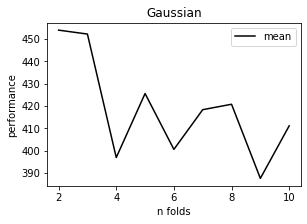

In [0]:
plt.figure(figsize=(10,3))
plt.subplot(122)
show_curve(GaussianNB())
plt.title("Gaussian")

# 3. Analisís de datos

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:3

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7efe60572400>,
      dtype=object)

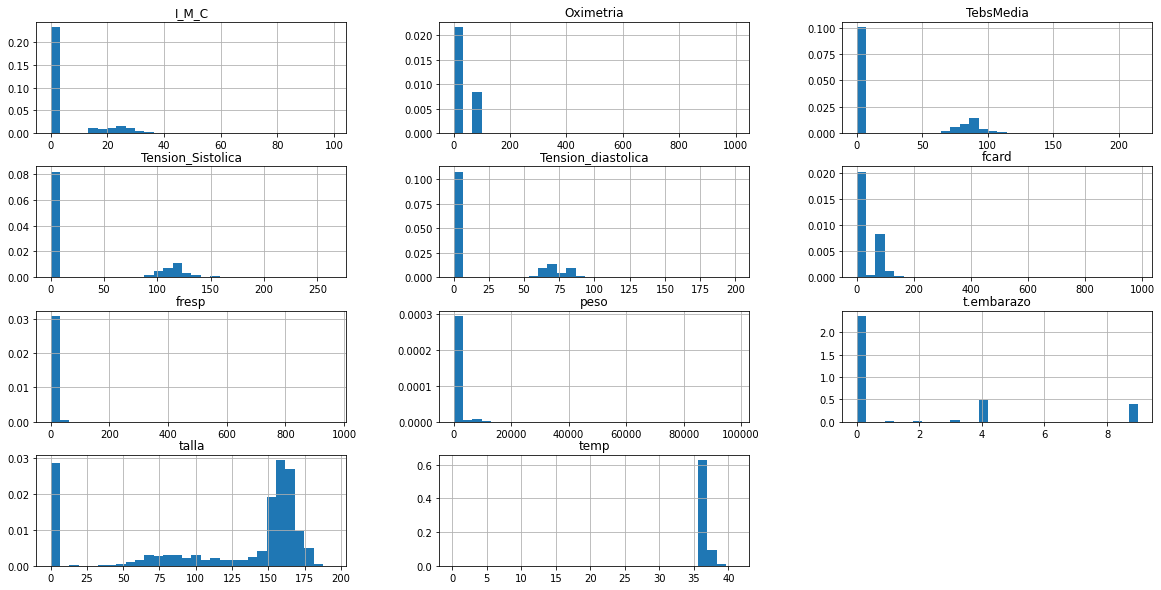

In [0]:
AtencionMedica.hist(bins=30,  density=True, figsize=(20,10))

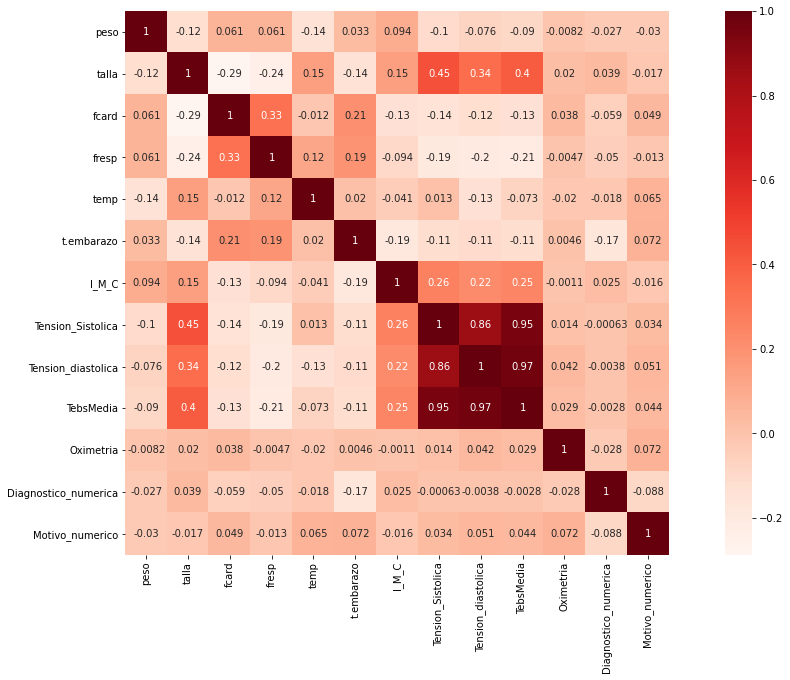

In [0]:
import seaborn as sns

plt.figure(figsize = (20,10))
sns.heatmap(AtencionMedica.corr(), square=True, annot=True, cmap="Reds")

#import seaborn as sns

#f, ax = plt.subplots(figsize=(10, 8))
#corr = d.corr()
#sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            #square=True, ax=ax)

**CONCLUSIONES:**


1. las caracteristicas corporales de los pacientes, es la mitad de informacion necesaria para el diagnostico de una enfermedad, si bien es cierto que con una buena salud se evitan enfermedades, hay otras caracteristicas que influyen en el diagnostico de una persona.
2. La calidad de los datos, influye en gran medida en la calidad de los resultados.
3. El buen manejo de los estimadores y sus parametros afectan la clasificacion.
4. mejorando la toma de medidas y los estimadores, se podria llegar a una buena clasificacion. 
